### <Center> Empowering Financial Security: Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics </center>

<ul>
    <li>
        <b>Importing Packages</b>
    </li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<ul>
    <li>
       <b> Importing Dataset </b>b
    </li>
</ul>

In [3]:
df = pd.read_csv("payment_fraud.csv")

<ul>
    <li>
        <b>Understanding Dataset</b>
    </li>
</ul>

In [4]:
df.shape

(39221, 8)

In [5]:
df.size

313768

In [6]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [7]:
df.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0
39220,272,1,5.040929,paypal,0.000694,shopping,0.0,0


In [8]:
df.describe(percentiles = [0,0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90,1])

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
0%,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
10%,7.000000,1.000000,4.461622,0.000000,0.000000,0.000000
20%,41.000000,1.000000,4.524580,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
30%,115.000000,1.000000,4.745402,0.000000,0.000000,0.000000
40%,243.000000,1.000000,4.836982,0.000694,0.000000,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [10]:
df["paymentMethod"].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

<ul>
    <li>
        <b>Dealing With Null Values</b>b
    </li>
</ul>

In [11]:
df.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [12]:
df["isWeekend"].mode()

0    0.0
Name: isWeekend, dtype: float64

In [13]:
df["Category"].mode()

0    shopping
Name: Category, dtype: object

<ul>
    <li>
        <b>Filling Null Values with mode</b>
    </li>
</ul>

In [14]:
df["label"].value_counts()

label
0    38661
1      560
Name: count, dtype: int64

In [15]:
df["isWeekend"].value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

In [16]:
df["Category"].value_counts()

Category
shopping       13328
food           12964
electronics    12834
Name: count, dtype: int64

 ### <b>Not Spam when Not a Weekednd </b>

In [17]:
df[(df["isWeekend"] == 0.0) & (df["label"]==0)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
5,119,1,4.962055,paypal,0.000000,shopping,0.0,0
7,371,1,4.876771,creditcard,0.000000,electronics,0.0,0
...,...,...,...,...,...,...,...,...
39213,108,1,4.748314,creditcard,48.965278,shopping,0.0,0
39215,1257,1,4.965339,creditcard,813.097222,shopping,0.0,0
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0


 ### <b>Not Spam when it is a Weekednd </b>

In [18]:
df[(df["isWeekend"] == 1.0) & (df["label"]==0)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
6,2000,1,4.921349,paypal,0.000000,electronics,1.0,0
9,4,1,4.461622,creditcard,0.000000,shopping,1.0,0
14,23,1,4.745402,creditcard,0.001389,shopping,1.0,0
...,...,...,...,...,...,...,...,...
39211,2000,1,4.886641,creditcard,0.000000,shopping,1.0,0
39212,2000,1,5.040929,creditcard,185.286806,shopping,1.0,0
39214,101,2,4.524580,storecredit,100.746528,shopping,1.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0


 ### <b>Spam when Not a Weekednd </b>

In [19]:
df[(df["isWeekend"] == 0.0) & (df["label"]==1)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label


 ### <b>Spam when it is a Weekednd </b>

In [20]:
df[(df["isWeekend"] == 1.0) & (df["label"]==1)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label


<p> <b> Undertanding : </b> when label is 1 , The isWeekend values or NaN </p>

### <b> When The weekend is null and label as spam

In [21]:
# Observation 

# There are only 560 rows where the label is 1(i.e. is spam) and for all of them the isweekend is NaN
# There is no evidence or idea given by the dataset wether to fill the null values of isweekend with 0 or one

In [22]:
df[(df["isWeekend"].isnull()) & (df["label"]==1)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [23]:
df["label"].value_counts()

label
0    38661
1      560
Name: count, dtype: int64

In [24]:
df["isWeekend"].value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

### inverse pattern imputation

In [25]:
# Estimating the percentage of 0.0 and 1.0 in the iweekend col when the label is zero and we willdo and Inverse Pattern Inputation in filling 
#isweekend col when label == 1
total_lab0 = df[df["label"]== 0.0]["label"].count() 
per_iw0_lab0 = df[ (df["isWeekend"]== 0.0 ) & (df["label"] == 0)]["isWeekend"].count()
per_iw1_lab0 = df[ (df["isWeekend"]== 1.0 ) & (df["label"] == 0)]["isWeekend"].count()
print("Percentage of isweekend = 0.0 when label = 0 = {}".format(((per_iw0_lab0)/total_lab0)*100))
print("Percentage of isweekend = 1.0 when label = 0 = {}".format(((per_iw1_lab0)/total_lab0)*100))

Percentage of isweekend = 0.0 when label = 0 = 50.04526525439073
Percentage of isweekend = 1.0 when label = 0 = 49.95473474560927


<p><b>Inverse pattern imputation has no strong patterns to fill isWeekend NaN values when label is 1 </b></p>

### Predict Isweekend NaN values using Machine Learning Models

In [26]:
data_copy2 = df.copy()
data_copy2["Category"] = df["Category"].fillna(df["Category"].mode()[0])

In [27]:
data_copy2["Category"].mode()

0    shopping
Name: Category, dtype: object

In [28]:
data_copy2.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                  0
isWeekend               560
label                     0
dtype: int64

In [29]:
#splitting data into target and feature and excluding label col

In [30]:
features = data_copy2[["accountAgeDays","numItems","localTime",	"paymentMethod","paymentMethodAgeDays","Category"]]
target = data_copy2["isWeekend"]

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39221 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


In [32]:
features.shape

(39221, 6)

In [33]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39221 entries, 0 to 39220
Series name: isWeekend
Non-Null Count  Dtype  
--------------  -----  
38661 non-null  float64
dtypes: float64(1)
memory usage: 306.5 KB


In [34]:
target.shape

(39221,)

### <center>for isWeekend Splitting data into train and test </center>

### Encoding Categorical

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
categorical_cols = ['paymentMethod', 'Category']
# Convert categorical columns into dummy/one-hot encoded columns
data_copy2 = pd.get_dummies(data_copy2, columns=categorical_cols, dummy_na=True)

In [37]:
data_copy2.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'isWeekend', 'label', 'paymentMethod_creditcard',
       'paymentMethod_paypal', 'paymentMethod_storecredit',
       'paymentMethod_nan', 'Category_electronics', 'Category_food',
       'Category_shopping', 'Category_nan'],
      dtype='object')

In [38]:
data_copy2.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethod_nan,Category_electronics,Category_food,Category_shopping,Category_nan
0,29,1,4.745402,28.204861,0.0,0,False,True,False,False,False,False,True,False
1,725,1,4.742303,0.000000,0.0,0,False,False,True,False,True,False,False,False
2,845,1,4.921318,0.000000,1.0,0,True,False,False,False,False,True,False,False
3,503,1,4.886641,0.000000,1.0,0,True,False,False,False,True,False,False,False
4,2000,1,5.040929,0.000000,0.0,0,True,False,False,False,False,False,True,False


In [39]:
# Convert all boolean columns to integers (0/1)
bool_cols = data_copy2.select_dtypes(include='bool').columns
data_copy2[bool_cols] = data_copy2[bool_cols].astype(int)

In [40]:
data_copy2.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethod_nan,Category_electronics,Category_food,Category_shopping,Category_nan
0,29,1,4.745402,28.204861,0.0,0,0,1,0,0,0,0,1,0
1,725,1,4.742303,0.000000,0.0,0,0,0,1,0,1,0,0,0
2,845,1,4.921318,0.000000,1.0,0,1,0,0,0,0,1,0,0
3,503,1,4.886641,0.000000,1.0,0,1,0,0,0,1,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,1,0,0,0,0,0,1,0


In [41]:
train = data_copy2[(data_copy2["isWeekend"] == 0.0) | (data_copy2["isWeekend"] == 1.0)][['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays','isWeekend','paymentMethod_creditcard','paymentMethod_paypal', 'paymentMethod_storecredit','paymentMethod_nan', 'Category_electronics', 'Category_food','Category_shopping', 'Category_nan']]
test = data_copy2[(data_copy2["isWeekend"] != 0.0) & (data_copy2["isWeekend"] != 1.0)][['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays','isWeekend','paymentMethod_creditcard','paymentMethod_paypal', 'paymentMethod_storecredit','paymentMethod_nan', 'Category_electronics', 'Category_food','Category_shopping', 'Category_nan']]

In [42]:
train["isWeekend"] = train["isWeekend"].map({0.0:0 , 1.0 :1})
test["isWeekend"] = train["isWeekend"].map({0.0:0 , 1.0 :1})

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38661 entries, 0 to 39220
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             38661 non-null  int64  
 1   numItems                   38661 non-null  int64  
 2   localTime                  38661 non-null  float64
 3   paymentMethodAgeDays       38661 non-null  float64
 4   isWeekend                  38661 non-null  int64  
 5   paymentMethod_creditcard   38661 non-null  int32  
 6   paymentMethod_paypal       38661 non-null  int32  
 7   paymentMethod_storecredit  38661 non-null  int32  
 8   paymentMethod_nan          38661 non-null  int32  
 9   Category_electronics       38661 non-null  int32  
 10  Category_food              38661 non-null  int32  
 11  Category_shopping          38661 non-null  int32  
 12  Category_nan               38661 non-null  int32  
dtypes: float64(2), int32(8), int64(3)
memory usage: 4.0

In [44]:
train.shape

(38661, 13)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 109 to 39183
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             560 non-null    int64  
 1   numItems                   560 non-null    int64  
 2   localTime                  560 non-null    float64
 3   paymentMethodAgeDays       560 non-null    float64
 4   isWeekend                  0 non-null      float64
 5   paymentMethod_creditcard   560 non-null    int32  
 6   paymentMethod_paypal       560 non-null    int32  
 7   paymentMethod_storecredit  560 non-null    int32  
 8   paymentMethod_nan          560 non-null    int32  
 9   Category_electronics       560 non-null    int32  
 10  Category_food              560 non-null    int32  
 11  Category_shopping          560 non-null    int32  
 12  Category_nan               560 non-null    int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 43.

In [46]:
test.shape

(560, 13)

### Train and Test Data

In [47]:
train_feature = train[['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays','paymentMethod_creditcard','paymentMethod_paypal', 'paymentMethod_storecredit','paymentMethod_nan', 'Category_electronics', 'Category_food','Category_shopping', 'Category_nan']]
train_target  = train["isWeekend"]
test_feature = test[['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays','paymentMethod_creditcard','paymentMethod_paypal', 'paymentMethod_storecredit','paymentMethod_nan', 'Category_electronics', 'Category_food','Category_shopping', 'Category_nan']]
test_target = test["isWeekend"]

In [48]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38661 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             38661 non-null  int64  
 1   numItems                   38661 non-null  int64  
 2   localTime                  38661 non-null  float64
 3   paymentMethodAgeDays       38661 non-null  float64
 4   paymentMethod_creditcard   38661 non-null  int32  
 5   paymentMethod_paypal       38661 non-null  int32  
 6   paymentMethod_storecredit  38661 non-null  int32  
 7   paymentMethod_nan          38661 non-null  int32  
 8   Category_electronics       38661 non-null  int32  
 9   Category_food              38661 non-null  int32  
 10  Category_shopping          38661 non-null  int32  
 11  Category_nan               38661 non-null  int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 3.7 MB


In [49]:
train_target.info()

<class 'pandas.core.series.Series'>
Index: 38661 entries, 0 to 39220
Series name: isWeekend
Non-Null Count  Dtype
--------------  -----
38661 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [50]:
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 109 to 39183
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             560 non-null    int64  
 1   numItems                   560 non-null    int64  
 2   localTime                  560 non-null    float64
 3   paymentMethodAgeDays       560 non-null    float64
 4   paymentMethod_creditcard   560 non-null    int32  
 5   paymentMethod_paypal       560 non-null    int32  
 6   paymentMethod_storecredit  560 non-null    int32  
 7   paymentMethod_nan          560 non-null    int32  
 8   Category_electronics       560 non-null    int32  
 9   Category_food              560 non-null    int32  
 10  Category_shopping          560 non-null    int32  
 11  Category_nan               560 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 39.4 KB


In [51]:
test_target.info()

<class 'pandas.core.series.Series'>
Index: 560 entries, 109 to 39183
Series name: isWeekend
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 8.8 KB


### Predicting Weekend values to fill in NaN

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

# Step 0: Set seed for reproducibility
np.random.seed(42)

model = RandomForestClassifier(random_state=42)
model.fit(train_feature, train_target)

# Step 7: Predict for missing isWeekend
predicted_values = model.predict(test_feature)

# Step 8: Fill predicted values into the original DataFrame
df.loc[df['isWeekend'].isnull(), 'isWeekend'] = predicted_values

### Fit Accuracy

In [53]:
model.score(train_feature , train_target)

0.9588991490132175

In [54]:
df[df["label"] == 1]["isWeekend"].value_counts()

isWeekend
0.0    299
1.0    261
Name: count, dtype: int64

In [55]:
print(df.groupby(['label', 'isWeekend']).size())

label  isWeekend
0      0.0          19348
       1.0          19313
1      0.0            299
       1.0            261
dtype: int64


### Exploring Data Set after Dealing With Null Value

In [56]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [57]:
df.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0
39220,272,1,5.040929,paypal,0.000694,shopping,0.0,0


In [58]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499069,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             39221 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [60]:
df.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

In [61]:
df.dtypes["accountAgeDays"]

dtype('int64')

In [62]:
for i in ["numItems","paymentMethod","Category","isWeekend","label"]:
    print(df[i].value_counts() ,"\n\n")

numItems
1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: count, dtype: int64 


paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64 


Category
shopping       13328
food           12964
electronics    12834
Name: count, dtype: int64 


isWeekend
0.0    19647
1.0    19574
Name: count, dtype: int64 


label
0    38661
1      560
Name: count, dtype: int64 




## <center> Dealing with out liers </center>

In [63]:
df.head(2)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0


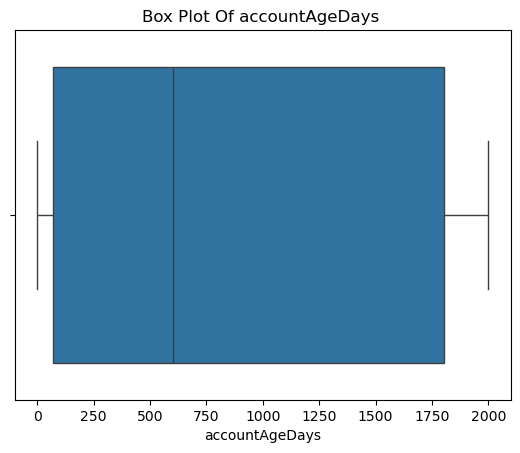

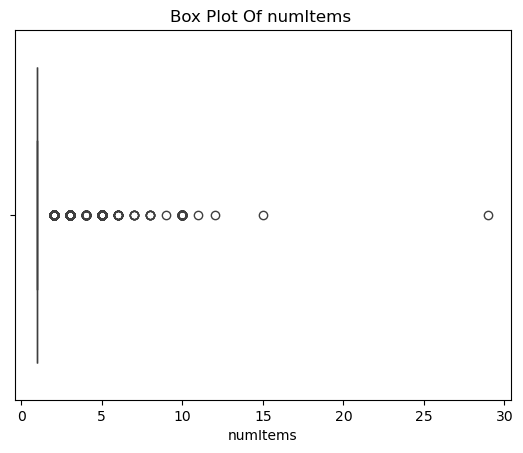

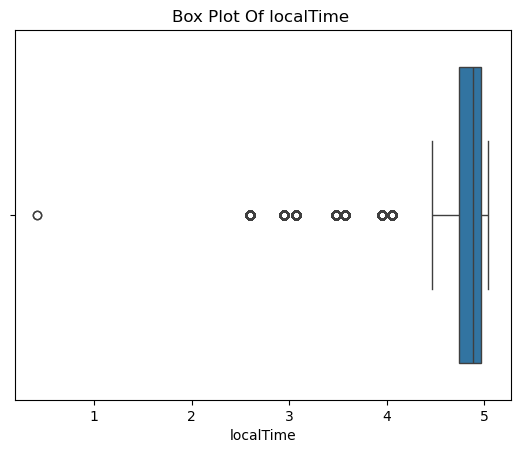

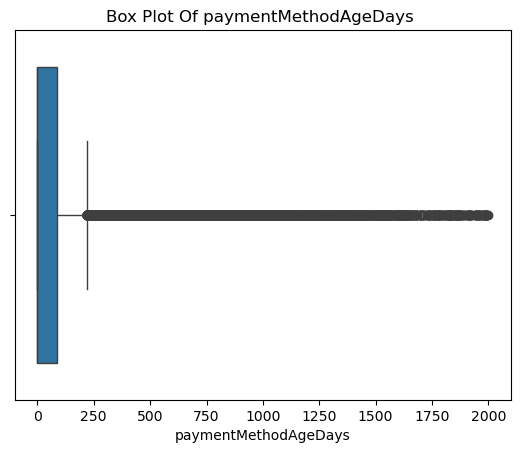

In [64]:
for i in ["accountAgeDays","numItems","localTime","paymentMethodAgeDays"]:
    sns.boxplot(df[i] , orient = "h")
    plt.title("Box Plot Of {} ".format(i))
    plt.show()

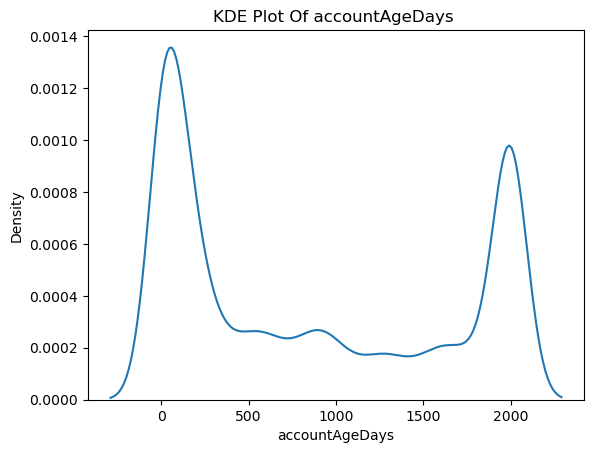

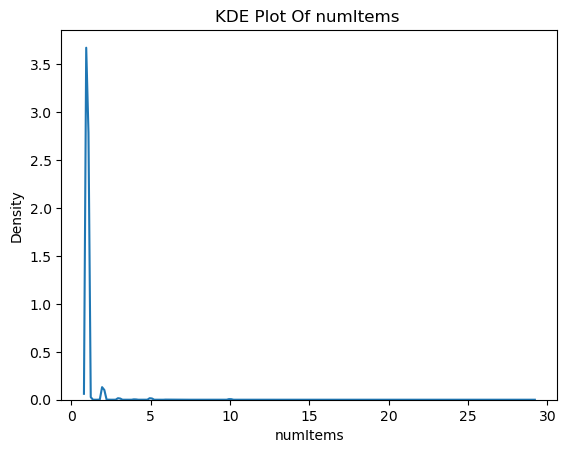

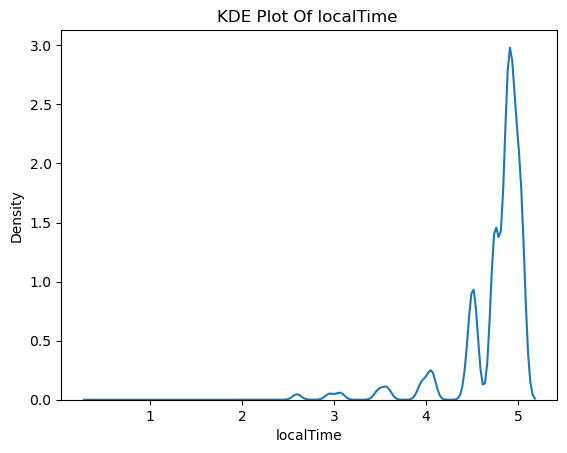

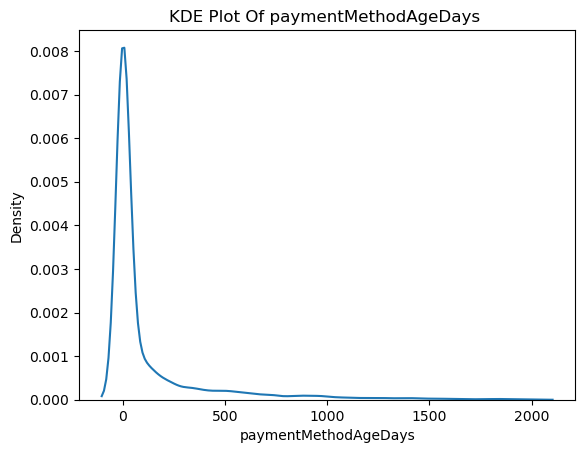

In [65]:
for i in ["accountAgeDays","numItems","localTime","paymentMethodAgeDays"]:
    sns.kdeplot(df[i] )
    plt.title("KDE Plot Of {} ".format(i))
    plt.show()

## <center>Dealining With Payment Method Age Days </center>

In [66]:
### InSight After not using a payment mtd for 300 days there are no fraud transaction from that method using freshly
### The fraud transactions are done using the payment methodthey use frequently

In [67]:
df[(df["paymentMethodAgeDays"] > 300) & (df["label"] == 1)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label


In [68]:
df[(df["paymentMethodAgeDays"] > 300) & (df["label"] == 0)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
20,1672,1,5.034622,creditcard,978.752778,shopping,0.0,0
27,2000,1,3.483951,creditcard,503.425000,electronics,1.0,0
28,1936,1,4.057414,creditcard,635.641667,shopping,1.0,0
29,2000,1,4.921318,creditcard,948.806944,electronics,0.0,0
39,1562,1,4.505662,creditcard,981.346528,food,1.0,0
...,...,...,...,...,...,...,...,...
39185,2000,1,4.876771,creditcard,1574.952083,shopping,1.0,0
39207,2000,1,4.921349,creditcard,410.779167,shopping,1.0,0
39208,508,1,4.748314,creditcard,357.716667,shopping,0.0,0
39215,1257,1,4.965339,creditcard,813.097222,shopping,0.0,0


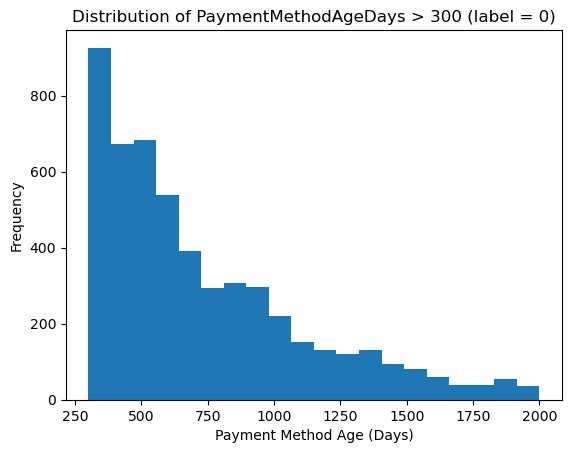

In [69]:
filtered_df = df[(df["paymentMethodAgeDays"] > 300) & (df["label"] == 0)]

plt.hist(filtered_df["paymentMethodAgeDays"], bins=20)
plt.xlabel("Payment Method Age (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of PaymentMethodAgeDays > 300 (label = 0)")
plt.show()

### Outliers of paymentMethodAgeDays

In [70]:
q1 = df["paymentMethodAgeDays"].quantile(0.25)
q3 = df["paymentMethodAgeDays"].quantile(0.75)
IQR = q3 - q1

lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR
print("Min Value of paymentMethodAgeDays : ",min(df["paymentMethodAgeDays"]))
print("Max Value of paymentMethodAgeDays : ",max(df["paymentMethodAgeDays"]))
print("Min Wishker of paymentMethodAgeDays : ",round(lower_fence,2))
print("Max Wishker of paymentMethodAgeDays : ",round(upper_fence,2))
print("First Quartile of paymentMethodAgeDays : ",round(df["paymentMethodAgeDays"].quantile(0.25),2))
print("Second Quartile of paymentMethodAgeDays : ",round(df["paymentMethodAgeDays"].quantile(0.50),2))
print("Third Quartile of paymentMethodAgeDays : ",round(df["paymentMethodAgeDays"].quantile(0.75),2))

Min Value of paymentMethodAgeDays :  0.0
Max Value of paymentMethodAgeDays :  1999.580556
Min Wishker of paymentMethodAgeDays :  -131.27
Max Wishker of paymentMethodAgeDays :  218.78
First Quartile of paymentMethodAgeDays :  0.0
Second Quartile of paymentMethodAgeDays :  0.01
Third Quartile of paymentMethodAgeDays :  87.51


### Removing Outliers in paymentMethodAgeDays

In [71]:
df = df.drop(df[(df["paymentMethodAgeDays"] > 218.78) & (df["label"] == 0)].index, axis=0)

In [72]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39213,108,1,4.748314,creditcard,48.965278,shopping,0.0,0
39214,101,2,4.524580,storecredit,100.746528,shopping,1.0,0
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0


## <center>Dealing With No of items </center>

In [73]:
### Insight While doing fraud The num of items bought are < 10

### And no of items bought after 10 and upto 30 are all not fraud transactions

### So we can remove the non fraud data where num items are greater than 10 to decrease data size

In [74]:
df[(df["numItems"] > 1) & (df["label"] == 1)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,1.0,1
578,1,2,4.505662,creditcard,0.000000,electronics,0.0,1
884,1,2,4.524580,creditcard,0.000000,food,1.0,1
1020,1,2,4.895263,paypal,0.001389,shopping,0.0,1
1577,1,2,2.596228,creditcard,0.007639,food,1.0,1
...,...,...,...,...,...,...,...,...
37522,1,2,4.057414,paypal,0.005556,shopping,0.0,1
38295,1,2,3.954522,creditcard,0.009028,shopping,0.0,1
38344,1,3,4.962055,creditcard,0.052083,food,1.0,1
38830,1,2,4.876771,creditcard,0.000000,NaN,0.0,1


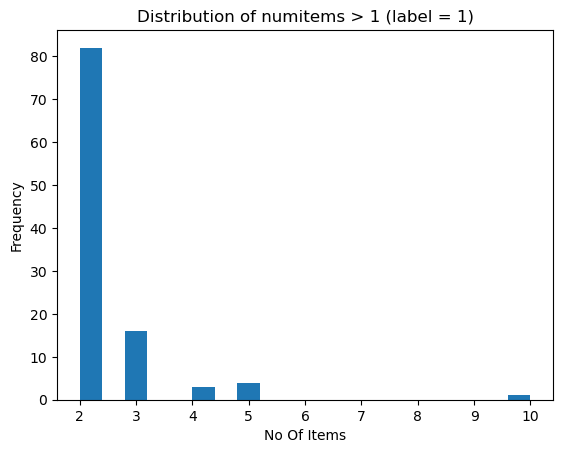

In [75]:
filtered_df = df[(df["numItems"] > 1) & (df["label"] == 1)]

plt.hist(filtered_df["numItems"], bins=20)
plt.xlabel("No Of Items")
plt.ylabel("Frequency")
plt.title("Distribution of numitems > 1 (label = 1)")
plt.show()

In [76]:
df[(df["numItems"] > 1) & (df["label"] == 0)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
73,162,2,4.748314,creditcard,161.954861,shopping,1.0,0
116,978,2,4.876771,creditcard,0.000000,food,1.0,0
135,19,2,4.962055,creditcard,0.000000,electronics,0.0,0
172,2000,4,4.742303,creditcard,0.000000,electronics,1.0,0
182,2000,5,2.596228,creditcard,217.588889,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39131,390,2,4.965339,paypal,0.000000,shopping,0.0,0
39148,40,2,4.886641,creditcard,39.893056,shopping,1.0,0
39157,2000,2,5.034622,creditcard,0.000694,shopping,0.0,0
39184,609,2,4.921318,creditcard,0.012500,shopping,0.0,0


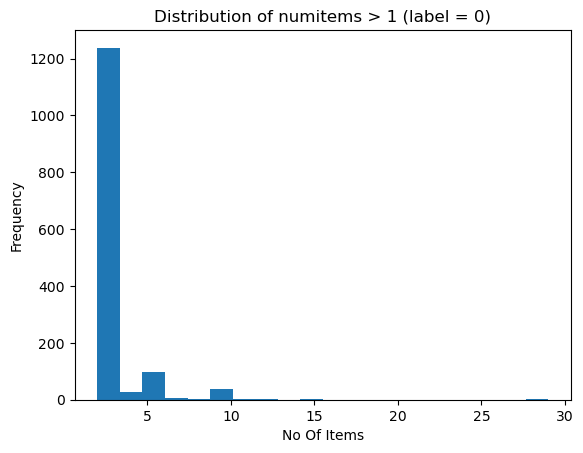

In [77]:
filtered_df = df[(df["numItems"] > 1) & (df["label"] == 0)]

plt.hist(filtered_df["numItems"], bins=20)
plt.xlabel("No Of Items")
plt.ylabel("Frequency")
plt.title("Distribution of numitems > 1 (label = 0)")
plt.show()

In [78]:
q1 = df["numItems"].quantile(0.25)
q3 = df["numItems"].quantile(0.75)
IQR = q3 - q1

lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR
print("Min Value of numItems : ",min(df["numItems"]))
print("Max Value of numItems : ",max(df["numItems"]))
print("Min Wishker of numItems : ",round(lower_fence,2))
print("Max Wishker of numItems : ",round(upper_fence,2))
print("First Quartile of numItems : ",round(df["numItems"].quantile(0.25),2))
print("Second Quartile of numItems : ",round(df["numItems"].quantile(0.50),2))
print("Third Quartile of numItems : ",round(df["numItems"].quantile(0.75),2))

Min Value of numItems :  1
Max Value of numItems :  29
Min Wishker of numItems :  1.0
Max Wishker of numItems :  1.0
First Quartile of numItems :  1.0
Second Quartile of numItems :  1.0
Third Quartile of numItems :  1.0


### Removing Outliers in numItems

In [79]:
df = df.drop(df[(df["numItems"] > 1) & (df["label"] == 0)].index, axis=0)

In [80]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39212,2000,1,5.040929,creditcard,185.286806,shopping,1.0,0
39213,108,1,4.748314,creditcard,48.965278,shopping,0.0,0
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0


## <center> Dealing with Local Time </center>

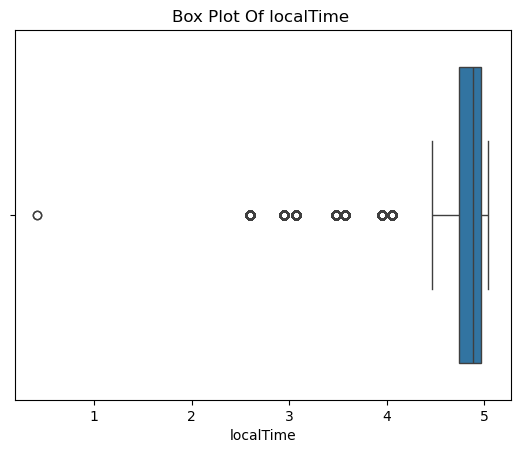

In [81]:
sns.boxplot(df["localTime"] , orient = "h")
plt.title("Box Plot Of {} ".format("localTime"))
plt.show()

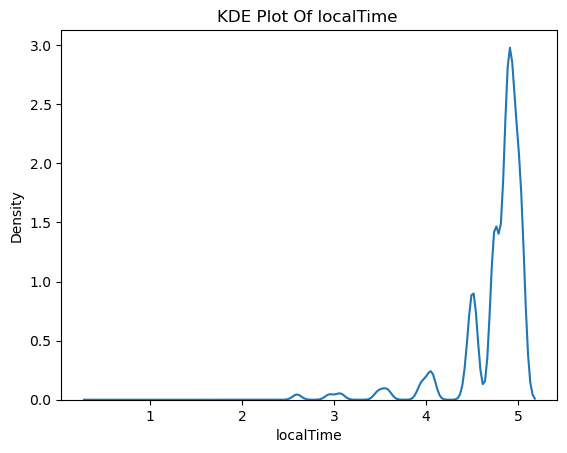

In [82]:
sns.kdeplot(df["localTime"] )
plt.title("KDE Plot Of {} ".format("localTime"))
plt.show()

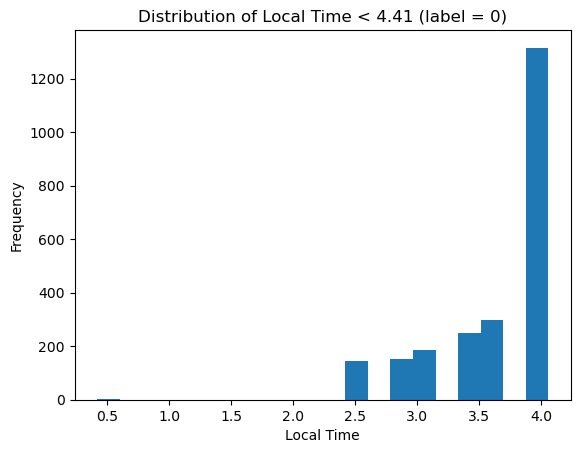

In [83]:
filtered_df = df[(df["localTime"] < 4.41) & (df["label"] == 0)]

plt.hist(filtered_df["localTime"], bins=20)
plt.xlabel("Local Time")
plt.ylabel("Frequency")
plt.title("Distribution of Local Time < 4.41 (label = 0)")
plt.show()

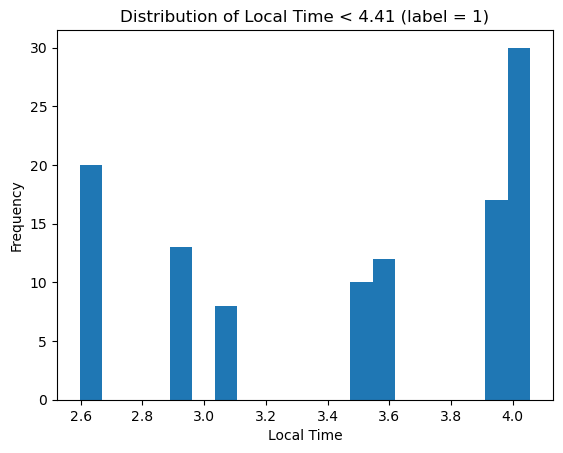

In [84]:
filtered_df = df[(df["localTime"] < 4.41) & (df["label"] == 1)]

plt.hist(filtered_df["localTime"], bins=20)
plt.xlabel("Local Time")
plt.ylabel("Frequency")
plt.title("Distribution of Local Time < 4.41 (label = 1)")
plt.show()

In [85]:
q1 = df["localTime"].quantile(0.25)
q3 = df["localTime"].quantile(0.75)
IQR = q3 - q1

lower_fence = q1 - 1.5*IQR
upper_fence = q3 + 1.5*IQR
print("Min Value of Local Time : ",min(df["localTime"]))
print("Max Value of Local Time : ",max(df["localTime"]))
print("Min Wishker of Local Time : ",round(lower_fence,2))
print("Max Wishker of Local Time : ",round(upper_fence,2))
print("First Quartile of Local Time : ",round(df["localTime"].quantile(0.25),2))
print("Second Quartile of Local Time : ",round(df["localTime"].quantile(0.50),2))
print("Third Quartile of Local Time : ",round(df["localTime"].quantile(0.75),2))

Min Value of Local Time :  0.4212135
Max Value of Local Time :  5.040929
Min Wishker of Local Time :  4.42
Max Wishker of Local Time :  5.29
First Quartile of Local Time :  4.75
Second Quartile of Local Time :  4.89
Third Quartile of Local Time :  4.96


In [86]:
df[(df["localTime"] < 4.42) & (df["label"] == 0)]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
25,30,1,4.057414,creditcard,0.000000,electronics,1.0,0
34,23,1,2.596228,creditcard,0.000694,shopping,1.0,0
63,200,1,2.948940,creditcard,199.620833,electronics,0.0,0
65,32,1,4.057414,paypal,23.433333,shopping,1.0,0
94,601,1,3.954522,creditcard,0.000000,shopping,1.0,0
...,...,...,...,...,...,...,...,...
39182,2,1,3.483951,creditcard,0.000000,shopping,1.0,0
39188,1072,1,4.057414,creditcard,0.219444,shopping,0.0,0
39189,1289,1,3.483951,creditcard,0.000000,shopping,0.0,0
39198,83,1,4.057414,paypal,82.795139,shopping,1.0,0


In [87]:
df = df.drop(df[(df["localTime"] < 4.42) & (df["label"] == 0)].index, axis=0)

In [88]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39212,2000,1,5.040929,creditcard,185.286806,shopping,1.0,0
39213,108,1,4.748314,creditcard,48.965278,shopping,0.0,0
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0


In [89]:
df.shape

(29107, 8)

### <center>Exploratory Data Analysis </center>

In [90]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [91]:
# Mapping weeken from 0.0 to 0 and 1.0 to 1
df["isWeekend"] = df["isWeekend"].map({0.0:0 , 1.0:1})

In [92]:
df["isWeekend"].value_counts()

isWeekend
0    14622
1    14485
Name: count, dtype: int64

In [93]:
# Min and max ages of label 1 and 0
df.groupby('label')['accountAgeDays'].agg(['min', 'max'])

,min,max
label,,
0,2,2000
1,1,1


In [94]:
# Mean Account Age of fraud and non fraud transactions  
df.groupby('label')['accountAgeDays'].agg(['mean'])

,mean
label,
0,756.919256
1,1.000000


In [95]:
# Min and Max numItems when label is  1 and 0

In [96]:
# Min and max  of label 1 and 0
df.groupby('label')['numItems'].agg(['min', 'max'])

,min,max
label,,
0,1,1
1,1,10


In [97]:
# mean numItems  of label 1 and 0
df.groupby('label')['numItems'].agg(['mean'])

,mean
label,
0,1.000000
1,1.264286


In [98]:
# Exploring the Time col

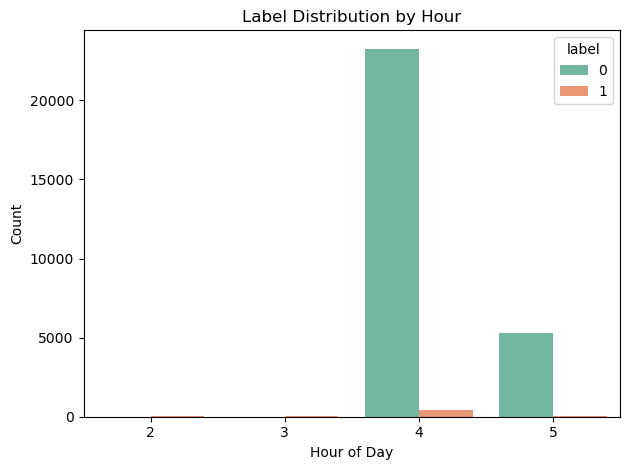

In [99]:
# Exploring the Time col
df['hour'] = df['localTime'].astype(float).astype(int)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='hour', hue='label', palette='Set2')
plt.title('Label Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [100]:
# Counting label 0 and 1 for paymentMethod

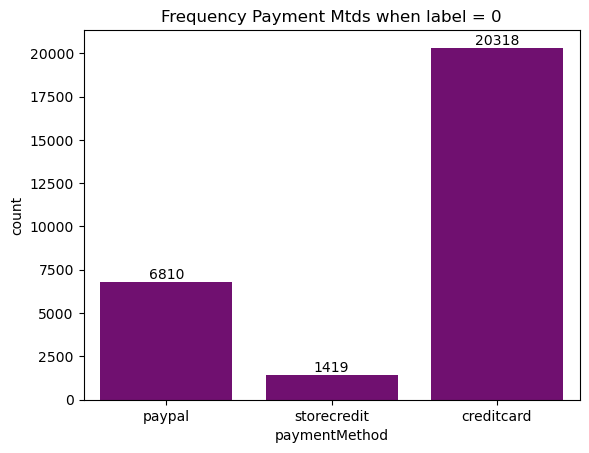

In [101]:
ax = sns.countplot(x=df[df["label"]==0]["paymentMethod"],color = 'purple')
ax.bar_label(ax.containers[0])
plt.title("Frequency Payment Mtds when label = 0")
plt.show()

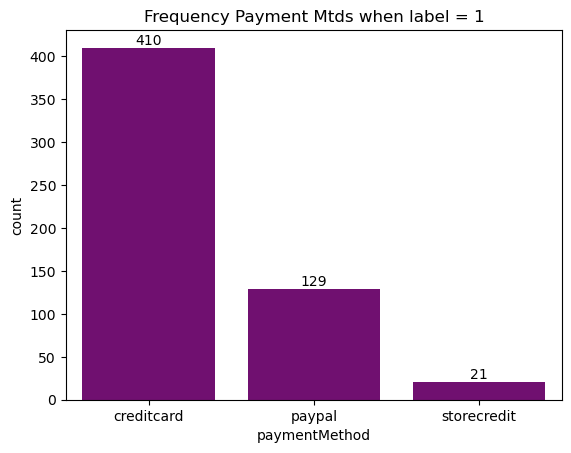

In [102]:
ax = sns.countplot(x=df[df["label"]==1]["paymentMethod"],color = 'purple')
ax.bar_label(ax.containers[0])
plt.title("Frequency Payment Mtds when label = 1")
plt.show()

<ul>
    <li>
        <b>Exploring paymentMethodAgeDays</b>
    </li>
</ul>

In [103]:
# Min and max paymentMethodAgeDays of label 1 and 0
df.groupby('label')['paymentMethodAgeDays'].agg(['min', 'max'])

,min,max
label,,
0,0.0,218.761806
1,0.0,0.991667


In [104]:
# Mmean paymentMethodAgeDays of label 1 and 0
df.groupby('label')['paymentMethodAgeDays'].agg(['mean'])

,mean
label,
0,20.105913
1,0.012476


<ul>
    <li>
        <b>Exploring Category</b>
    </li>
</ul>

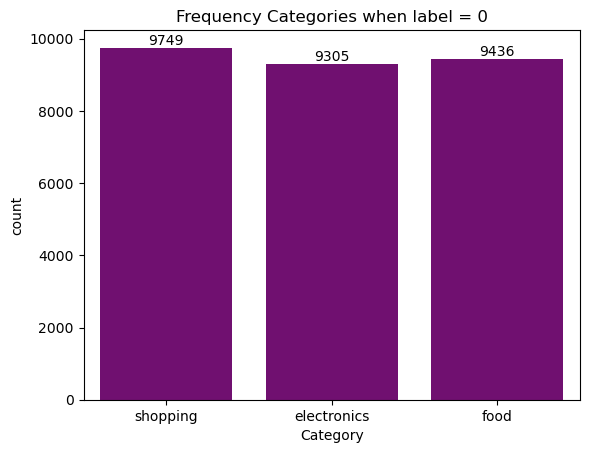

In [105]:
ax = sns.countplot(x=df[df["label"]==0]["Category"],color = 'purple')
ax.bar_label(ax.containers[0])
plt.title("Frequency Categories when label = 0")
plt.show()

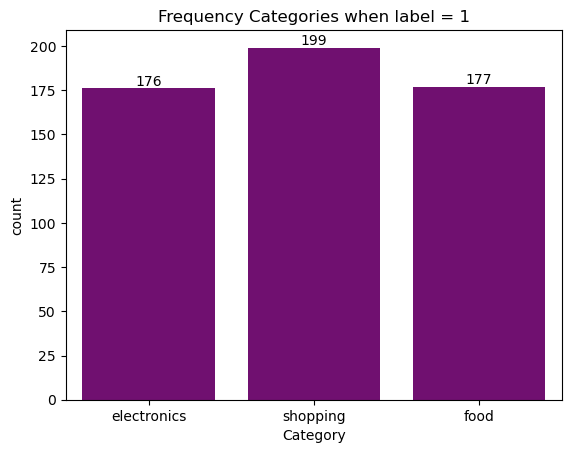

In [106]:
ax = sns.countplot(x=df[df["label"]==1]["Category"],color = 'purple')
ax.bar_label(ax.containers[0])
plt.title("Frequency Categories when label = 1")
plt.show()

<ul>
    <li>
        <b>Exploring isWeekend Column</b>
    </li>
</ul>

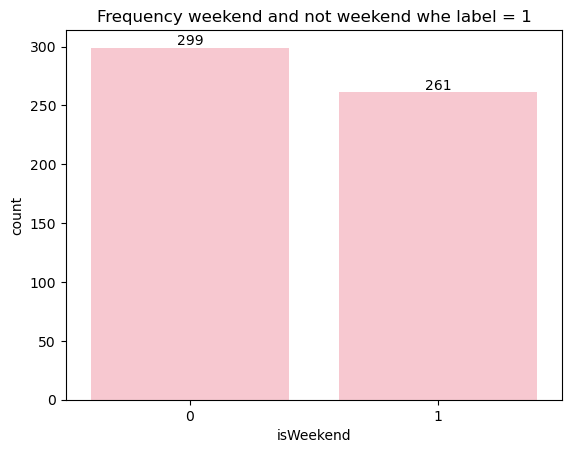

In [107]:
ax = sns.countplot(x=df[df["label"]==1]["isWeekend"],color = 'pink')
ax.bar_label(ax.containers[0])
plt.title("Frequency weekend and not weekend whe label = 1")
plt.show()

## <center> Making Get dummies for paymentMethod and Category </center>

In [108]:
df.drop("hour" , axis = 1)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0,0
2,845,1,4.921318,creditcard,0.000000,food,1,0
3,503,1,4.886641,creditcard,0.000000,electronics,1,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0,0
...,...,...,...,...,...,...,...,...
39212,2000,1,5.040929,creditcard,185.286806,shopping,1,0
39213,108,1,4.748314,creditcard,48.965278,shopping,0,0
39216,986,1,4.836982,creditcard,0.000000,shopping,0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1,0


In [109]:
df.isnull().sum()

accountAgeDays           0
numItems                 0
localTime                0
paymentMethod            0
paymentMethodAgeDays     0
Category                65
isWeekend                0
label                    0
hour                     0
dtype: int64

In [110]:
df["paymentMethod"].fillna(df["paymentMethod"].mode()[0] , inplace = True)
df["Category"].fillna(df["Category"].mode()[0] , inplace = True)

C:\Users\99406\AppData\Local\Temp\ipykernel_18420\1323449732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["paymentMethod"].fillna(df["paymentMethod"].mode()[0] , inplace = True)
C:\Users\99406\AppData\Local\Temp\ipykernel_18420\1323449732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [111]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
hour                    0
dtype: int64

In [112]:
categorical_cols = ['paymentMethod', 'Category']
# Convert categorical columns into dummy/one-hot encoded columns
df = pd.get_dummies(df, columns=categorical_cols)

In [113]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,hour,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,0,4,False,True,False,False,False,True
1,725,1,4.742303,0.000000,0,0,4,False,False,True,True,False,False
2,845,1,4.921318,0.000000,1,0,4,True,False,False,False,True,False
3,503,1,4.886641,0.000000,1,0,4,True,False,False,True,False,False
4,2000,1,5.040929,0.000000,0,0,5,True,False,False,False,False,True


In [114]:
# Convert all boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [115]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,hour,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,0,4,0,1,0,0,0,1
1,725,1,4.742303,0.000000,0,0,4,0,0,1,1,0,0
2,845,1,4.921318,0.000000,1,0,4,1,0,0,0,1,0
3,503,1,4.886641,0.000000,1,0,4,1,0,0,1,0,0
4,2000,1,5.040929,0.000000,0,0,5,1,0,0,0,0,1


## <center> Making New Dataset For Scaling </center>

In [116]:
df_scaled = df.copy()

In [117]:
df_scaled.drop("hour" , axis = 1,inplace = True)

In [118]:
df_scaled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,0,0,1,0,0,0,1
1,725,1,4.742303,0.000000,0,0,0,0,1,1,0,0
2,845,1,4.921318,0.000000,1,0,1,0,0,0,1,0
3,503,1,4.886641,0.000000,1,0,1,0,0,1,0,0
4,2000,1,5.040929,0.000000,0,0,1,0,0,0,0,1


In [119]:
sc = StandardScaler()

In [120]:
for i in ["accountAgeDays","numItems","localTime","paymentMethodAgeDays"]:
    df_scaled[i] = sc.fit_transform(df_scaled[[i]])

In [121]:
df_scaled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,-0.909706,-0.048704,-0.522147,0.186763,0,0,0,1,0,0,0,1
1,-0.022158,-0.048704,-0.538760,-0.434015,0,0,0,0,1,1,0,0
2,0.130868,-0.048704,0.420897,-0.434015,1,0,1,0,0,0,1,0
3,-0.305255,-0.048704,0.235002,-0.434015,1,0,1,0,0,1,0,0
4,1.603738,-0.048704,1.062103,-0.434015,0,0,1,0,0,0,0,1


In [122]:
df_scaled.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,2.910700e+04,2.910700e+04,2.910700e+04,2.910700e+04,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000
mean,-6.542256e-17,-5.936853e-16,-3.286019e-15,6.444611e-17,0.497647,0.019239,0.712131,0.238396,0.049473,0.325729,0.330264,0.344007
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.500003,0.137368,0.452777,0.426110,0.216856,0.468655,0.470316,0.475051
min,-9.454119e-01,-4.870392e-02,-1.204335e+01,-4.340148e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.893025e-01,-4.870392e-02,-5.065364e-01,-4.340148e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.309678e-01,-4.870392e-02,2.350015e-01,-4.339995e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.049021e+00,-4.870392e-02,6.392780e-01,-3.440964e-01,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.603738e+00,8.615822e+01,1.062103e+00,4.380848e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29107 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             29107 non-null  float64
 1   numItems                   29107 non-null  float64
 2   localTime                  29107 non-null  float64
 3   paymentMethodAgeDays       29107 non-null  float64
 4   isWeekend                  29107 non-null  int64  
 5   label                      29107 non-null  int64  
 6   paymentMethod_creditcard   29107 non-null  int32  
 7   paymentMethod_paypal       29107 non-null  int32  
 8   paymentMethod_storecredit  29107 non-null  int32  
 9   Category_electronics       29107 non-null  int32  
 10  Category_food              29107 non-null  int32  
 11  Category_shopping          29107 non-null  int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 2.2 MB


### <center>Splitting Dataset into feature and Target for scaled data</center>

In [124]:
X_scaled = df_scaled.drop("label",axis = 1)
Y_scaled = df_scaled["label"]

In [125]:
X_scaled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,-0.909706,-0.048704,-0.522147,0.186763,0,0,1,0,0,0,1
1,-0.022158,-0.048704,-0.538760,-0.434015,0,0,0,1,1,0,0
2,0.130868,-0.048704,0.420897,-0.434015,1,1,0,0,0,1,0
3,-0.305255,-0.048704,0.235002,-0.434015,1,1,0,0,1,0,0
4,1.603738,-0.048704,1.062103,-0.434015,0,1,0,0,0,0,1


In [126]:
X_scaled.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,2.910700e+04,2.910700e+04,2.910700e+04,2.910700e+04,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000
mean,-6.542256e-17,-5.936853e-16,-3.286019e-15,6.444611e-17,0.497647,0.712131,0.238396,0.049473,0.325729,0.330264,0.344007
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.500003,0.452777,0.426110,0.216856,0.468655,0.470316,0.475051
min,-9.454119e-01,-4.870392e-02,-1.204335e+01,-4.340148e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.893025e-01,-4.870392e-02,-5.065364e-01,-4.340148e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.309678e-01,-4.870392e-02,2.350015e-01,-4.339995e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.049021e+00,-4.870392e-02,6.392780e-01,-3.440964e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.603738e+00,8.615822e+01,1.062103e+00,4.380848e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29107 entries, 0 to 39220
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             29107 non-null  float64
 1   numItems                   29107 non-null  float64
 2   localTime                  29107 non-null  float64
 3   paymentMethodAgeDays       29107 non-null  float64
 4   isWeekend                  29107 non-null  int64  
 5   paymentMethod_creditcard   29107 non-null  int32  
 6   paymentMethod_paypal       29107 non-null  int32  
 7   paymentMethod_storecredit  29107 non-null  int32  
 8   Category_electronics       29107 non-null  int32  
 9   Category_food              29107 non-null  int32  
 10  Category_shopping          29107 non-null  int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 2.0 MB


In [128]:
Y_scaled.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [129]:
Y_scaled.tail()

39212    0
39213    0
39216    0
39218    0
39220    0
Name: label, dtype: int64

In [130]:
Y_scaled.describe()

count    29107.000000
mean         0.019239
std          0.137368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [131]:
Y_scaled.info()

<class 'pandas.core.series.Series'>
Index: 29107 entries, 0 to 39220
Series name: label
Non-Null Count  Dtype
--------------  -----
29107 non-null  int64
dtypes: int64(1)
memory usage: 454.8 KB


In [132]:
Y_scaled.value_counts()

label
0    28547
1      560
Name: count, dtype: int64

## <center>Splitting Dataset into Train and Test datasets</center>

In [133]:
X_train_scaled , X_test_scaled , Y_train_scaled , Y_test_scaled = train_test_split(X_scaled,Y_scaled, shuffle = True , stratify = Y_scaled , test_size = 0.30)

<ul>
    <li>
        <b>Exploring Scaled Feature Column</b>
    </li>
</ul>

In [134]:
X_train_scaled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
10329,-0.891853,-0.048704,-0.506536,-0.434000,0,1,0,0,1,0,0
19353,1.603738,-0.048704,1.062103,1.467570,0,1,0,0,0,1,0
36248,-0.726075,-0.048704,0.639278,2.802224,1,0,1,0,0,1,0
19652,1.603738,-0.048704,-0.506536,-0.433908,1,1,0,0,0,0,1
19337,-0.908431,-0.048704,0.182091,0.183951,0,1,0,0,1,0,0


In [135]:
X_train_scaled.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
22044,1.603738,-0.048704,0.182091,-0.434000,0,0,1,0,1,0,0
36607,1.603738,-0.048704,0.281222,-0.434015,0,1,0,0,1,0,0
7854,-0.880376,-0.048704,-0.538760,-0.434015,1,0,1,0,0,0,1
15126,1.603738,-0.048704,0.656883,-0.434015,0,1,0,0,1,0,0
27363,-0.025984,-0.048704,0.639278,-0.434015,0,1,0,0,0,1,0


In [136]:
X_train_scaled.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000
mean,0.002775,0.000660,-0.002987,0.010792,0.500589,0.712035,0.238147,0.049818,0.325267,0.331894,0.342839
std,1.000334,1.057790,0.993533,1.015096,0.500012,0.452826,0.425960,0.217575,0.468486,0.470905,0.474670
min,-0.945412,-0.048704,-12.043355,-0.434015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.888027,-0.048704,-0.506536,-0.434015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.524592,-0.048704,0.235002,-0.434000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.049021,-0.048704,0.639278,-0.334192,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.603738,86.158221,1.062103,4.380848,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20374 entries, 10329 to 27363
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             20374 non-null  float64
 1   numItems                   20374 non-null  float64
 2   localTime                  20374 non-null  float64
 3   paymentMethodAgeDays       20374 non-null  float64
 4   isWeekend                  20374 non-null  int64  
 5   paymentMethod_creditcard   20374 non-null  int32  
 6   paymentMethod_paypal       20374 non-null  int32  
 7   paymentMethod_storecredit  20374 non-null  int32  
 8   Category_electronics       20374 non-null  int32  
 9   Category_food              20374 non-null  int32  
 10  Category_shopping          20374 non-null  int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 1.4 MB


In [138]:
X_train_scaled.shape

(20374, 11)

<ul>
    <li>
        <b>Exploring Scaled Feature Test Column</b>
    </li>
</ul>

In [139]:
X_test_scaled.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
25757,-0.866349,-0.048704,0.938671,0.931957,0,1,0,0,0,1,0
11752,-0.854872,-0.048704,1.062103,0.932859,1,1,0,0,0,0,1
21649,-0.925008,-0.048704,-0.538760,-0.434000,1,1,0,0,0,1,0
37300,-0.886752,-0.048704,-2.043424,-0.433938,1,0,1,0,0,0,1
29473,-0.894403,-0.048704,-0.538760,-0.434015,0,1,0,0,1,0,0


In [140]:
X_test_scaled.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
13872,-0.538619,-0.048704,0.639278,-0.434015,1,1,0,0,0,1,0
35113,0.369332,-0.048704,0.938671,-0.433923,1,0,1,0,1,0,0
21901,0.125767,-0.048704,0.281222,-0.434015,1,1,0,0,1,0,0
22204,-0.703121,-0.048704,1.062103,0.082202,0,0,1,0,1,0,0
37748,-0.932660,-0.048704,0.639278,-0.433954,1,1,0,0,1,0,0


In [141]:
X_test_scaled.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000
mean,-0.006473,-0.001541,0.006968,-0.025178,0.490782,0.712355,0.238979,0.048666,0.326806,0.326463,0.346731
std,0.999305,0.850159,1.015008,0.963508,0.499944,0.452690,0.426484,0.215181,0.469073,0.468946,0.475956
min,-0.945412,-0.048704,-12.043355,-0.434015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.891853,-0.048704,-0.506536,-0.434015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.541169,-0.048704,0.235002,-0.434000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.045195,-0.048704,0.639278,-0.356538,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.603738,38.265485,1.062103,4.380527,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8733 entries, 25757 to 37748
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             8733 non-null   float64
 1   numItems                   8733 non-null   float64
 2   localTime                  8733 non-null   float64
 3   paymentMethodAgeDays       8733 non-null   float64
 4   isWeekend                  8733 non-null   int64  
 5   paymentMethod_creditcard   8733 non-null   int32  
 6   paymentMethod_paypal       8733 non-null   int32  
 7   paymentMethod_storecredit  8733 non-null   int32  
 8   Category_electronics       8733 non-null   int32  
 9   Category_food              8733 non-null   int32  
 10  Category_shopping          8733 non-null   int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 614.0 KB


<ul>
    <li>
        <b>Exploring Scaled Target Train Column</b>
    </li>
</ul>

In [143]:
Y_train_scaled.shape

(20374,)

In [144]:
Y_train_scaled.head()

10329    0
19353    0
36248    0
19652    0
19337    0
Name: label, dtype: int64

In [145]:
Y_train_scaled.tail()

22044    0
36607    0
7854     0
15126    0
27363    0
Name: label, dtype: int64

In [146]:
Y_train_scaled.describe()

count    20374.000000
mean         0.019240
std          0.137372
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [147]:
Y_train_scaled.info()

<class 'pandas.core.series.Series'>
Index: 20374 entries, 10329 to 27363
Series name: label
Non-Null Count  Dtype
--------------  -----
20374 non-null  int64
dtypes: int64(1)
memory usage: 318.3 KB


In [148]:
Y_train_scaled.shape

(20374,)

<ul>
    <li>
        <b>Exploring Target Test Column</b>
    </li>
</ul>

In [149]:
Y_test_scaled.head()

25757    0
11752    0
21649    0
37300    0
29473    0
Name: label, dtype: int64

In [150]:
Y_test_scaled.tail()

13872    0
35113    0
21901    0
22204    0
37748    0
Name: label, dtype: int64

In [151]:
Y_test_scaled.describe()

count    8733.000000
mean        0.019237
std         0.137366
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

In [152]:
Y_test_scaled.info()

<class 'pandas.core.series.Series'>
Index: 8733 entries, 25757 to 37748
Series name: label
Non-Null Count  Dtype
--------------  -----
8733 non-null   int64
dtypes: int64(1)
memory usage: 136.5 KB


In [153]:
Y_test_scaled.shape

(8733,)

In [154]:
Y_test_scaled.value_counts()

label
0    8565
1     168
Name: count, dtype: int64

## <center>Building Model Using Scaled Data</center>

### <center> KNN Classifier </center>

In [155]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_scaled, Y_train_scaled)

# Make predictions
Y_pred_scaled = knn.predict(X_test_scaled)
acc_knn = accuracy_score(Y_test_scaled, Y_pred_scaled)
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_scaled, Y_pred_scaled))
print("\nClassification Report:\n", classification_report(Y_test_scaled, Y_pred_scaled))
print("Confusion Matrix:\n", confusion_matrix(Y_test_scaled, Y_pred_scaled))

Accuracy: 0.9938165578838887

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       0.90      0.76      0.83       168

    accuracy                           0.99      8733
   macro avg       0.95      0.88      0.91      8733
weighted avg       0.99      0.99      0.99      8733

Confusion Matrix:
 [[8551   14]
 [  40  128]]


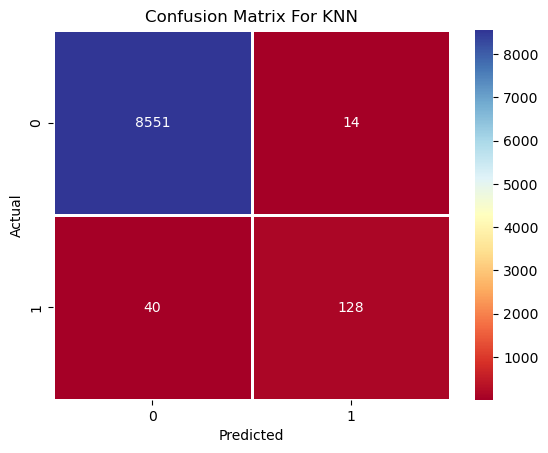

In [156]:
cm = confusion_matrix(Y_test_scaled, Y_pred_scaled)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix For KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center> Logistic Regression </center>

In [157]:
# Initialize Logistic Regression
# Use class_weight='balanced' to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train_scaled, Y_train_scaled)

# Make predictions
Y_pred = log_reg.predict(X_test_scaled)
acc_lr = accuracy_score(Y_test_scaled, Y_pred)
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_scaled, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test_scaled, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test_scaled, Y_pred))

Accuracy: 0.8444978815985343

Confusion Matrix:
 [[7207 1358]
 [   0  168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      8565
           1       0.11      1.00      0.20       168

    accuracy                           0.84      8733
   macro avg       0.56      0.92      0.56      8733
weighted avg       0.98      0.84      0.90      8733



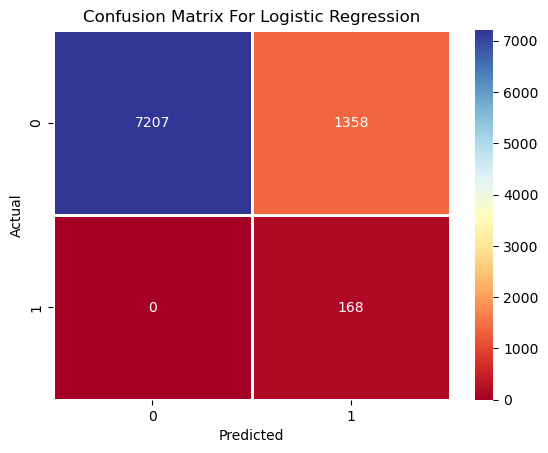

In [158]:
cm = confusion_matrix(Y_test_scaled, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix For Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center>Naive Bayes Classification </center>

In [159]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, Y_train_scaled)

# Predict on test data
Y_pred = nb_model.predict(X_test_scaled)
acc_nb = accuracy_score(Y_test_scaled, Y_pred)
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_scaled, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test_scaled, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test_scaled, Y_pred))

Accuracy: 0.9925569678231994

Confusion Matrix:
 [[8565    0]
 [  65  103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8565
           1       1.00      0.61      0.76       168

    accuracy                           0.99      8733
   macro avg       1.00      0.81      0.88      8733
weighted avg       0.99      0.99      0.99      8733



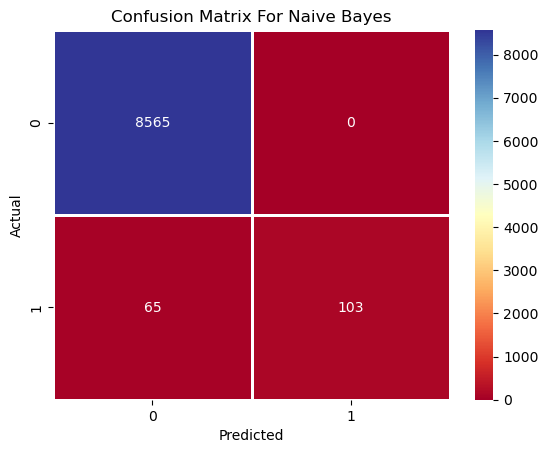

In [160]:
cm = confusion_matrix(Y_test_scaled, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix For Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center> Support Vector Machine Classifier </center>

In [161]:
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, Y_train_scaled)

# Make predictions
Y_pred = svm_model.predict(X_test_scaled)
acc_svm = accuracy_score(Y_test_scaled, Y_pred)
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test_scaled, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test_scaled, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test_scaled, Y_pred))

Accuracy: 0.8157563265773503

Confusion Matrix:
 [[6957 1608]
 [   1  167]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90      8565
           1       0.09      0.99      0.17       168

    accuracy                           0.82      8733
   macro avg       0.55      0.90      0.53      8733
weighted avg       0.98      0.82      0.88      8733



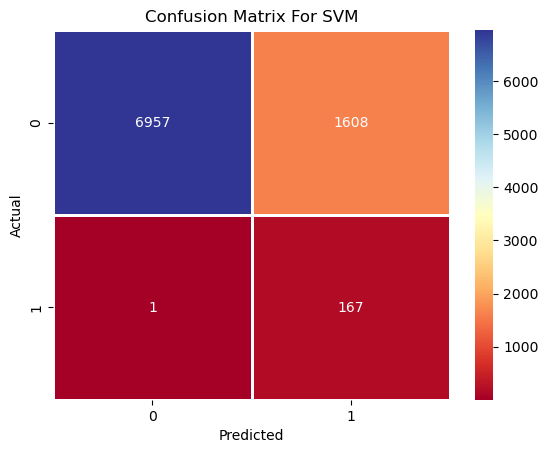

In [162]:
cm = confusion_matrix(Y_test_scaled, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix For SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center> Scaled Data Classifiers Completed </center>

## <center>Splitting Dataset into Feature and Target Columns </center>

In [163]:
X = df.drop(["label","hour"],axis = 1)

In [164]:
Y = df["label"]

### Exploring Feature and target columns

<ul>
    <li>
        <b>Exploring Feature Column</b>
    </li>
</ul>

In [165]:
X.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,0,1,0,0,0,1
1,725,1,4.742303,0.000000,0,0,0,1,1,0,0
2,845,1,4.921318,0.000000,1,1,0,0,0,1,0
3,503,1,4.886641,0.000000,1,1,0,0,1,0,0
4,2000,1,5.040929,0.000000,0,1,0,0,0,0,1


In [166]:
X.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
39212,2000,1,5.040929,185.286806,1,1,0,0,0,0,1
39213,108,1,4.748314,48.965278,0,1,0,0,0,0,1
39216,986,1,4.836982,0.000000,0,1,0,0,0,0,1
39218,1591,1,4.742303,0.000000,1,1,0,0,0,0,1
39220,272,1,5.040929,0.000694,0,0,1,0,0,0,1


In [167]:
X.shape

(29107, 11)

In [168]:
X.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000
mean,742.375855,1.005085,4.842804,19.719328,0.497647,0.712131,0.238396,0.049473,0.325729,0.330264,0.344007
std,784.196417,0.104402,0.186544,45.435472,0.500003,0.452777,0.426110,0.216856,0.468655,0.470316,0.475051
min,1.000000,1.000000,2.596228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,1.000000,4.748314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,326.000000,1.000000,4.886641,0.000694,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1565.000000,1.000000,4.962055,4.085417,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2000.000000,10.000000,5.040929,218.761806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29107 entries, 0 to 39220
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             29107 non-null  int64  
 1   numItems                   29107 non-null  int64  
 2   localTime                  29107 non-null  float64
 3   paymentMethodAgeDays       29107 non-null  float64
 4   isWeekend                  29107 non-null  int64  
 5   paymentMethod_creditcard   29107 non-null  int32  
 6   paymentMethod_paypal       29107 non-null  int32  
 7   paymentMethod_storecredit  29107 non-null  int32  
 8   Category_electronics       29107 non-null  int32  
 9   Category_food              29107 non-null  int32  
 10  Category_shopping          29107 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 2.0 MB


<ul>
    <li>
        <b>Exploring Target Column</b>
    </li>
</ul>

In [170]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [171]:
Y.tail()

39212    0
39213    0
39216    0
39218    0
39220    0
Name: label, dtype: int64

In [172]:
Y.describe()

count    29107.000000
mean         0.019239
std          0.137368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [173]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 29107 entries, 0 to 39220
Series name: label
Non-Null Count  Dtype
--------------  -----
29107 non-null  int64
dtypes: int64(1)
memory usage: 454.8 KB


In [174]:
Y.value_counts()

label
0    28547
1      560
Name: count, dtype: int64

### Splitting Dataset into Train and Test datasets

In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30 , shuffle = True , stratify = Y)

<ul>
    <li>
        <b>Exploring Feature Set</b>
    </li>
</ul>

In [176]:
X_train.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
37426,151,1,4.876771,0.000694,1,1,0,0,1,0,0
35991,14,1,4.965339,13.888889,0,1,0,0,1,0,0
4400,909,1,4.836982,105.527083,1,0,1,0,0,1,0
33371,129,1,4.921318,0.000000,1,1,0,0,1,0,0
13643,226,1,4.895263,0.000000,1,0,1,0,0,0,1


In [177]:
X_train.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
8834,72,1,5.017904,71.379861,0,1,0,0,1,0,0
8911,2000,1,4.745402,0.000694,0,1,0,0,0,0,1
27487,2000,1,4.745402,0.000000,1,1,0,0,0,1,0
19568,2,1,4.921349,0.000000,1,1,0,0,1,0,0
1528,1417,1,5.040929,189.054861,0,1,0,0,1,0,0


In [178]:
X_train.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000,20374.000000
mean,744.237901,1.004957,4.843464,19.855614,0.497300,0.711691,0.238392,0.049917,0.320163,0.333022,0.346815
std,784.205914,0.090943,0.187306,45.680259,0.500005,0.452987,0.426111,0.217778,0.466550,0.471306,0.475968
min,1.000000,1.000000,2.596228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,4.748314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,332.000000,1.000000,4.886641,0.000694,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1566.000000,1.000000,4.962055,4.126042,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2000.000000,5.000000,5.040929,218.761806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20374 entries, 37426 to 1528
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             20374 non-null  int64  
 1   numItems                   20374 non-null  int64  
 2   localTime                  20374 non-null  float64
 3   paymentMethodAgeDays       20374 non-null  float64
 4   isWeekend                  20374 non-null  int64  
 5   paymentMethod_creditcard   20374 non-null  int32  
 6   paymentMethod_paypal       20374 non-null  int32  
 7   paymentMethod_storecredit  20374 non-null  int32  
 8   Category_electronics       20374 non-null  int32  
 9   Category_food              20374 non-null  int32  
 10  Category_shopping          20374 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 1.4 MB


In [180]:
X_train.shape

(20374, 11)

<ul>
    <li>
        <b>Exploring Test Feature Set</b>
    </li>
</ul>

In [181]:
X_test.shape

(8733, 11)

In [182]:
X_test.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
25751,42,1,4.836982,0.000000,1,1,0,0,0,1,0
9556,115,1,4.461622,0.000000,0,1,0,0,0,0,1
4082,2000,1,4.921318,19.794444,0,0,0,1,1,0,0
11053,141,1,5.034622,0.000000,1,1,0,0,1,0,0
36630,2000,1,4.461622,0.020139,1,0,1,0,0,0,1


In [183]:
X_test.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
29733,1772,1,5.040929,166.052778,1,1,0,0,1,0,0
33006,23,1,4.524580,22.147917,1,0,1,0,1,0,0
18596,3,1,4.505662,0.010417,0,1,0,0,0,1,0
36355,692,1,4.742303,0.002778,1,1,0,0,0,1,0
19507,2000,1,4.748314,0.000000,0,1,0,0,0,0,1


In [184]:
X_test.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
count,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000
mean,738.031719,1.005382,4.841262,19.401375,0.498454,0.713157,0.238406,0.048437,0.338715,0.323829,0.337456
std,784.201969,0.130517,0.184756,44.860179,0.500026,0.452314,0.426133,0.214700,0.473300,0.467963,0.472869
min,1.000000,1.000000,2.596228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.000000,4.748314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,313.000000,1.000000,4.886641,0.000694,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1561.000000,1.000000,4.962055,4.013194,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2000.000000,10.000000,5.040929,218.704861,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8733 entries, 25751 to 19507
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             8733 non-null   int64  
 1   numItems                   8733 non-null   int64  
 2   localTime                  8733 non-null   float64
 3   paymentMethodAgeDays       8733 non-null   float64
 4   isWeekend                  8733 non-null   int64  
 5   paymentMethod_creditcard   8733 non-null   int32  
 6   paymentMethod_paypal       8733 non-null   int32  
 7   paymentMethod_storecredit  8733 non-null   int32  
 8   Category_electronics       8733 non-null   int32  
 9   Category_food              8733 non-null   int32  
 10  Category_shopping          8733 non-null   int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 614.0 KB


<ul>
    <li>
        <b>Exploring Test Target Set</b>
    </li>
</ul>

In [186]:
Y_train.head()

37426    0
35991    0
4400     0
33371    0
13643    0
Name: label, dtype: int64

In [187]:
Y_train.tail()

8834     0
8911     0
27487    0
19568    0
1528     0
Name: label, dtype: int64

In [188]:
Y_train.describe()

count    20374.000000
mean         0.019240
std          0.137372
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [189]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 20374 entries, 37426 to 1528
Series name: label
Non-Null Count  Dtype
--------------  -----
20374 non-null  int64
dtypes: int64(1)
memory usage: 318.3 KB


In [190]:
Y_train.shape

(20374,)

<ul>
    <li>
        <b>Exploring Test Target Set</b>
    </li>
</ul>

In [191]:
Y_test.head()

25751    0
9556     0
4082     0
11053    0
36630    0
Name: label, dtype: int64

In [192]:
Y_test.tail()

29733    0
33006    0
18596    0
36355    0
19507    0
Name: label, dtype: int64

In [193]:
Y_test.describe()

count    8733.000000
mean        0.019237
std         0.137366
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64

In [194]:
Y_test.info()

<class 'pandas.core.series.Series'>
Index: 8733 entries, 25751 to 19507
Series name: label
Non-Null Count  Dtype
--------------  -----
8733 non-null   int64
dtypes: int64(1)
memory usage: 136.5 KB


In [195]:
Y_test.shape

(8733,)

## <center> Building Model </center>

## <center> Decision Tree Classifier </center>

In [196]:
# Initialize the Decision Tree Classifier
# Use class_weight='balanced' if the data is imbalanced
dt_model = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=42)

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred = dt_model.predict(X_test)
acc_dt = accuracy_score(Y_test, Y_pred)
# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[8565    0]
 [   0  168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00       168

    accuracy                           1.00      8733
   macro avg       1.00      1.00      1.00      8733
weighted avg       1.00      1.00      1.00      8733



In [197]:
Y_pred_test = dt_model.predict(np.array([1.000000,1.000000,4.921349,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000]).reshape(1,-1))

C:\Users\99406\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [198]:
Y_pred_test

array([1], dtype=int64)

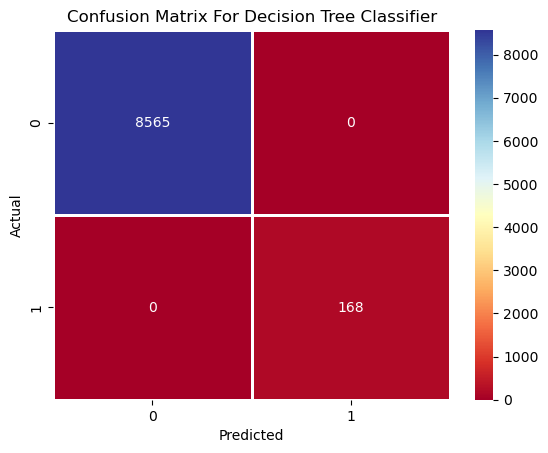

In [199]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix For Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center> Random Forest Classifier </center>

In [200]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Step 3: Fit the model
rf_model.fit(X_train, Y_train)

# Step 4: Predict
Y_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(Y_test, Y_pred)
# Step 5: Evaluate
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[8565    0]
 [   0  168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00       168

    accuracy                           1.00      8733
   macro avg       1.00      1.00      1.00      8733
weighted avg       1.00      1.00      1.00      8733



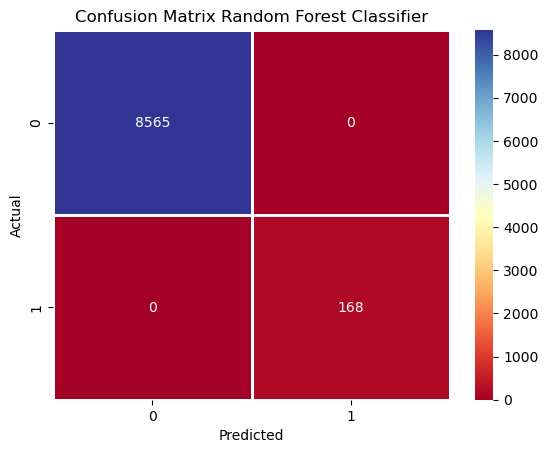

In [201]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## <center> Random Forest Classifier with GridSearchCV</center>

In [202]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 3: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Step 4: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Step 5: Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Step 6: Best parameters
print("Best Parameters from Grid Search:\n", grid_search.best_params_)

# Step 7: Evaluate the best model on test set
best_rf = grid_search.best_estimator_
Y_pred = best_rf.predict(X_test)
acc_rf_gs = accuracy_score(Y_test, Y_pred)
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters from Grid Search:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy: 1.0

Confusion Matrix:
 [[8565    0]
 [   0  168]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8565
           1       1.00      1.00      1.00       168

    accuracy                           1.00      8733
   macro avg       1.00      1.00      1.00      8733
weighted avg       1.00      1.00      1.00      8733



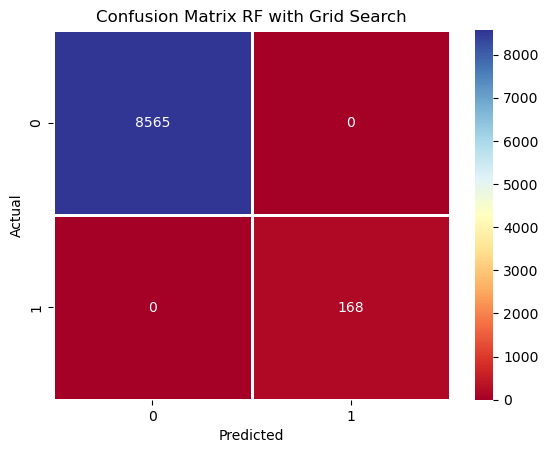

In [203]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='RdYlBu',linewidths=1)
plt.title('Confusion Matrix RF with Grid Search')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Accuracies

In [204]:
acc = [acc_knn , acc_lr , acc_nb , acc_svm , acc_dt , acc_rf , acc_rf_gs]

In [205]:
acc

[0.9938165578838887,
 0.8444978815985343,
 0.9925569678231994,
 0.8157563265773503,
 1.0,
 1.0,
 1.0]

In [206]:
models = ["KNN","Logistic Regression","Navie Bayes","SVM","Decision Tree","Random Forest","RF with Grid Search"]

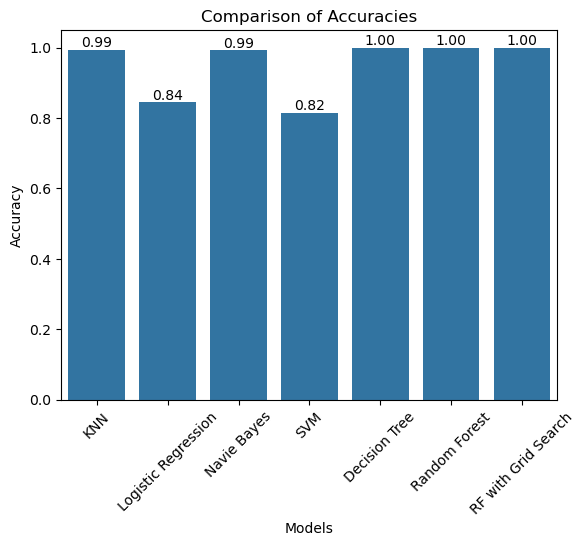

In [207]:
ax = sns.barplot(x=models, y=acc)
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title("Comparison of Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [208]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

accountAgeDays               0.795247
paymentMethodAgeDays         0.109607
localTime                    0.049286
numItems                     0.036307
isWeekend                    0.003243
Category_food                0.001204
Category_shopping            0.001131
Category_electronics         0.001086
paymentMethod_paypal         0.001033
paymentMethod_creditcard     0.001026
paymentMethod_storecredit    0.000830
dtype: float64


In [2]:
my_sdr = "python programming is fun"
words = my_sdr.split(" ")
new_str = words[0][::-1] +" "+ words[1][::-1] +" "+ words[2] +" "+ words[3]
print(new_str)

nohtyp gnimmargorp is fun
